## Expresso Churn Prediction Challenge

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import missingno
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [168]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
# vars = pd.read_csv("/content/drive/MyDrive/Ds_project/VariableDefinitions.csv")

## Reading data

In [132]:
#import data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [170]:
vars[["Variable Definitions", "Unnamed: 2"]]

,Variable Definitions,Unnamed: 2
0,NaN,English
1,NaN,The churn dataset includes 19 variables includ...
2,user_id,NaN
3,REGION,the location of each client
4,TENURE,duration in the network
5,MONTANT,top-up amount
6,FREQUENCE_RECH,number of times the customer refilled
7,REVENUE,monthly income of each client
8,ARPU_SEGMENT,income over 90 days / 3
9,FREQUENCE,number of times the client has made an income


In [3]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
train.shape

(2154048, 19)

In [5]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


## EDA and feature engineering

### Check for dummy features

In [6]:
train.user_id.nunique()

2154048

In [7]:
train.REGION.value_counts()

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64

In [8]:
train.TENURE.value_counts()

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64

In [9]:
train.MRG.value_counts()

NO    2154048
Name: MRG, dtype: int64

In [ ]:
train = train.drop(columns=["MRG"])
test = test.drop(columns=["MRG"])

In [11]:
train.TOP_PACK.value_counts()

All-net 500F=2000F;5d                     317802
On net 200F=Unlimited _call24H            152295
Data:490F=1GB,7d                          115180
Data: 100 F=40MB,24H                       84649
Mixt 250F=Unlimited_call24H                67512
                                           ...  
ESN_POSTPAID_CLASSIC_RENT                      1
NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE         1
1500=Unlimited7Day                             1
Data:New-GPRS_PKG_1500F                        1
CVM_100f=500 onNet                             1
Name: TOP_PACK, Length: 140, dtype: int64

<AxesSubplot:xlabel='REVENUE', ylabel='ARPU_SEGMENT'>

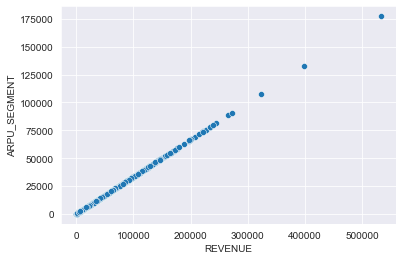

In [12]:
sns.scatterplot(data=train, x='REVENUE', y='ARPU_SEGMENT')

In [135]:
# ARPU_SEGMENT repeats REVENUE
train = train.drop(columns=["ARPU_SEGMENT"])
test = test.drop(columns=["ARPU_SEGMENT"])

### Check for features with missing values

<AxesSubplot:>

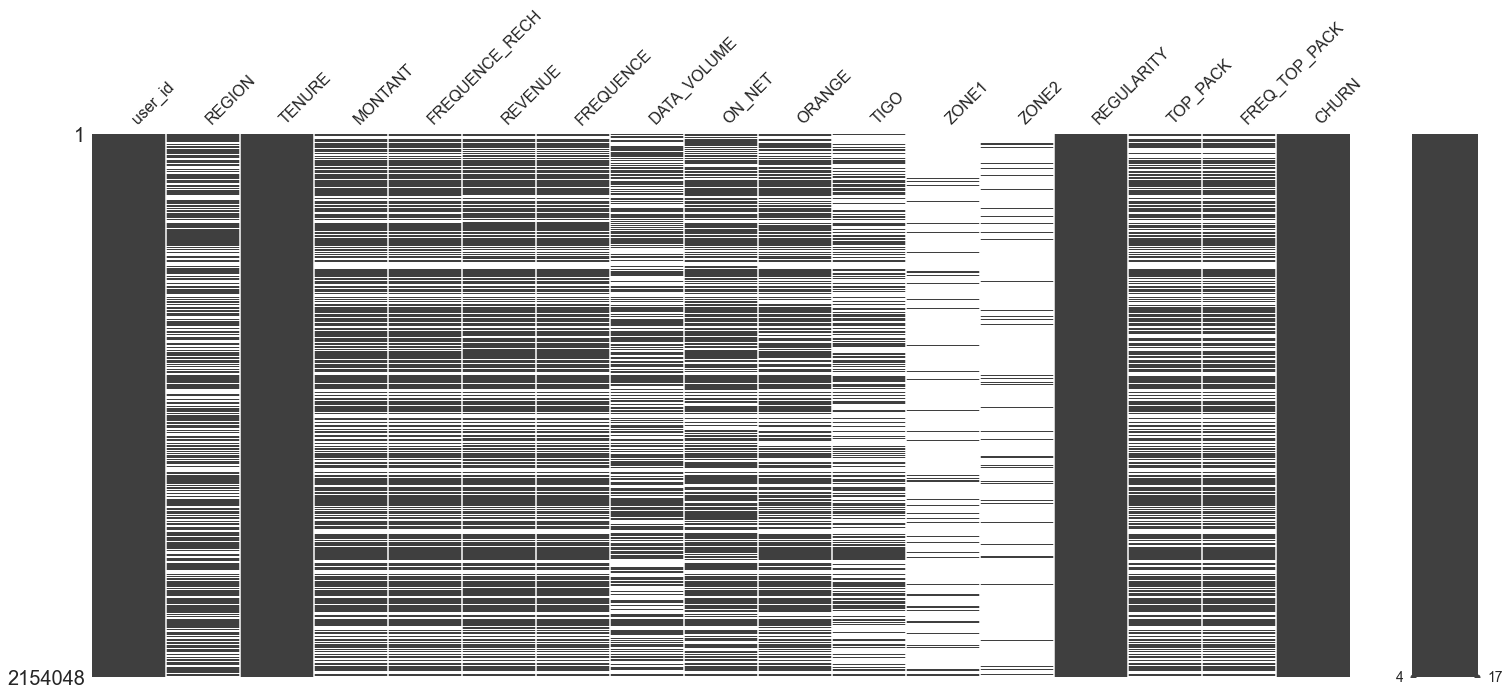

In [14]:
missingno.matrix(train)

In [136]:
train = train.drop(columns=["ZONE1", "ZONE2"])
test = test.drop(columns=["ZONE1", "ZONE2"])

In [137]:
train["REGION"] = train["REGION"].fillna("No region")
test["REGION"] = test["REGION"].fillna("No region")

### Check features of churn

In [18]:
train.CHURN.value_counts()

0    1750062
1     403986
Name: CHURN, dtype: int64

In [19]:
train_pos = train[train.CHURN==1]
train_neg = train[train.CHURN==0]

<AxesSubplot:>

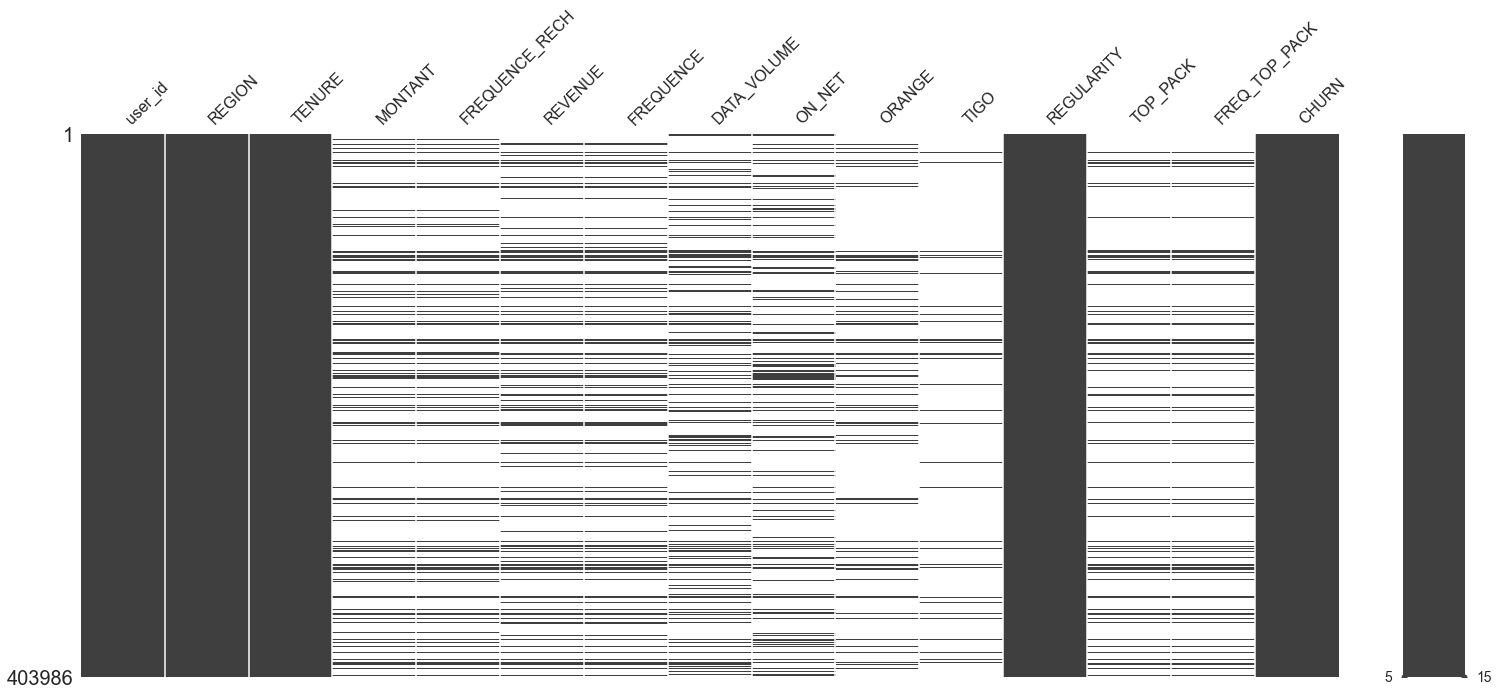

In [20]:
missingno.matrix(train_pos)

In [21]:
from sklearn.impute import MissingIndicator

In [138]:
indicator = MissingIndicator()
train['TIGO_na'] = indicator.fit_transform(np.array(train['TIGO']).reshape(-1, 1)).astype(int)
train['ORANGE_na'] = indicator.fit_transform(np.array(train['ORANGE']).reshape(-1, 1)).astype(int)
train.drop(columns=['TIGO', 'ORANGE'], inplace=True)

test['TIGO_na'] = indicator.fit_transform(np.array(test['TIGO']).reshape(-1, 1)).astype(int)
test['ORANGE_na'] = indicator.fit_transform(np.array(test['ORANGE']).reshape(-1, 1)).astype(int)
test.drop(columns=['TIGO', 'ORANGE'], inplace=True)

### Check features and target dependencies

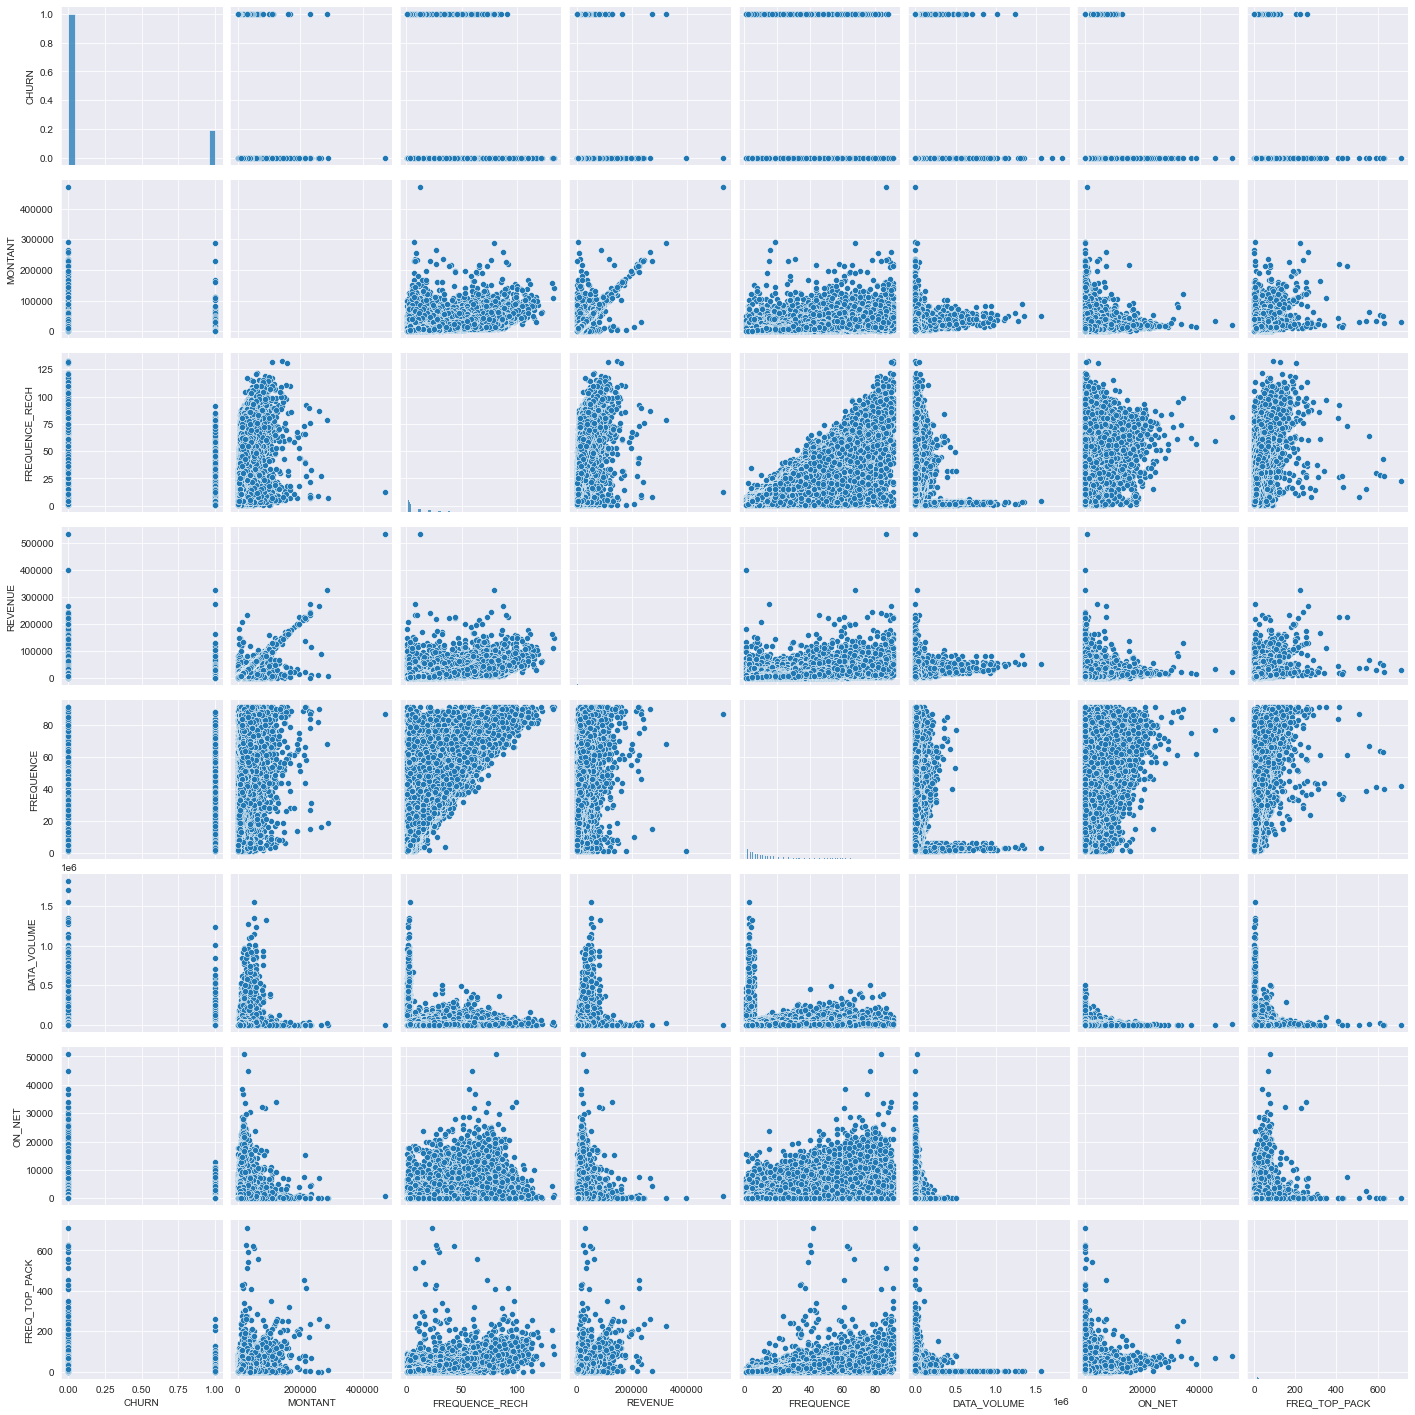

In [103]:
sns.pairplot(train[['CHURN', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'TOP_PACK', 'FREQ_TOP_PACK']])

In [139]:
# FREQUENCE is the same for churn and non-churn
train = train.drop(columns=["FREQUENCE"])
test = test.drop(columns=["FREQUENCE"])

In [140]:
train_new = train.copy()
test_new = test.copy()

## Base model on numerical only features without scaling

In [141]:
train_pos = train_new[train_new.CHURN==1].dropna()
train_neg = train_new[train_new.CHURN==0]
train_neg = train_neg[(train_neg.TIGO_na==0)&(train_new.ORANGE_na==0)].dropna()
train_final = pd.concat((train_pos, train_neg)).drop(columns=['TIGO_na', 'ORANGE_na'])
train_final.drop(columns='user_id', inplace=True)
train_final['CHURN'].value_counts()
#test_new.drop(columns=['user_id', 'TIGO_na', 'ORANGE_na'], inplace=True)

0    510936
1     26017
Name: CHURN, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

def get_metrics(y_true, y_pred):
    print("Accuracy score is", accuracy_score(y_true, y_pred))
    print("ROC AUC score is", roc_auc_score(y_true, y_pred))
    print("Recall score is", recall_score(y_true, y_pred))
    print("Precision score is", precision_score(y_true, y_pred))
    print("F1 score is", f1_score(y_true, y_pred))

X = train_final.drop(columns='CHURN')
y = train_final['CHURN']

X_train,X_test,y_train,y_test = train_test_split(X.select_dtypes(include=["int64", "float64"]), y, test_size = 0.3, random_state=42, shuffle=True, stratify=y)

In [143]:
model_lr = LogisticRegression(class_weight="balanced")
model_lr.fit(X_train, y_train)
print("Result of Logistic Regression :")
get_metrics(y_test, model_lr.predict(X_test))

print("-----------------------------------")
xgb = XGBClassifier(scale_pos_weight=(y_train.shape[0] - y_train.sum())/y_train.sum())
xgb.fit(X_train, y_train)
print("Result of XGBoost:")
get_metrics(y_test, xgb.predict(X_test))

Result of Logistic Regression :
Accuracy score is 0.8222440187229182
ROC AUC score is 0.7791605959688302
Recall score is 0.7314541960281871
Precision score is 0.17703972462554657
F1 score is 0.2850793967841806
-----------------------------------
[00:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Result of XGBoost:
Accuracy score is 0.8371739319369778
ROC AUC score is 0.8126022611262986
Recall score is 0.7853939782190903
Precision score is 0.19977838612957893
F1 score is 0.3185325677466289


## Base model on numerical only features with scaling

In [144]:
train_pos = train_new[train_new.CHURN==1].dropna()
train_neg = train_new[train_new.CHURN==0]
train_neg = train_neg[(train_neg.TIGO_na==0)&(train_new.ORANGE_na==0)].dropna()
train_final = pd.concat((train_pos, train_neg)).drop(columns=['TIGO_na', 'ORANGE_na'])
train_final.drop(columns='user_id', inplace=True)
train_final['CHURN'].value_counts()
#test_new.drop(columns=['user_id', 'TIGO_na', 'ORANGE_na'], inplace=True)

0    510936
1     26017
Name: CHURN, dtype: int64

In [145]:
print(X.shape)
print(y.shape)

(536953, 10)
(536953,)


In [146]:
X = train_final.drop(columns='CHURN')
y = train_final['CHURN']

scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X.select_dtypes(include=["int64", "float64"]), y, test_size = 0.3, random_state=42, shuffle=True, stratify=y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
model_lr = LogisticRegression(class_weight="balanced")
model_lr.fit(X_train, y_train)
print("Result of Logistic Regression :")
get_metrics(y_test, model_lr.predict(X_test))

print("-----------------------------------")
xgb = XGBClassifier(scale_pos_weight=(y_train.shape[0] - y_train.sum())/y_train.sum())
xgb.fit(X_train, y_train)
print("Result of XGBoost:")
get_metrics(y_test, xgb.predict(X_test))

Result of Logistic Regression :
Accuracy score is 0.8080962963882646
ROC AUC score is 0.8075374519623911
Recall score is 0.8069186418962204
Precision score is 0.17639480170289043
F1 score is 0.28950332115194555
-----------------------------------
[00:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Result of XGBoost:
Accuracy score is 0.8371801398011001
ROC AUC score is 0.8126055231091929
Recall score is 0.7853939782190903
Precision score is 0.19978489717433107
F1 score is 0.3185408438993972


### Categorical features

In [148]:
train_new['TOP_PACK_cat'] = train_new['TOP_PACK'].fillna('No top pack')
data_cond = train_new.TOP_PACK_cat.str.lower().str.contains('data')
mixt_cond = train_new.TOP_PACK_cat.str.lower().str.contains('mixt')
onnet_cond = (~(train_new.TOP_PACK_cat.str.lower().str.contains('mixt')))&(train_new.TOP_PACK_cat.str.lower().str.contains('on net'))|(train_new.TOP_PACK_cat.str.lower().str.contains('on-net'))
allnet_cond = train_new.TOP_PACK_cat.str.lower().str.contains('all-net')
train_new.loc[data_cond, 'TOP_PACK_cat'] = 'Data'
train_new.loc[mixt_cond, 'TOP_PACK_cat'] = 'Mixt'
train_new.loc[onnet_cond, 'TOP_PACK_cat'] = 'On-net'
train_new.loc[allnet_cond, 'TOP_PACK_cat'] = 'All-net'
train_new.loc[(~data_cond)&(~mixt_cond)&(~onnet_cond)&(~allnet_cond)&(~(train_new.TOP_PACK_cat=='No top pack')), 'TOP_PACK_cat'] = 'Others'

In [149]:
test_new['TOP_PACK_cat'] = test_new['TOP_PACK'].fillna('No top pack')
data_cond = test_new.TOP_PACK_cat.str.lower().str.contains('data')
mixt_cond = test_new.TOP_PACK_cat.str.lower().str.contains('mixt')
onnet_cond = (~(test_new.TOP_PACK_cat.str.lower().str.contains('mixt')))&(test_new.TOP_PACK_cat.str.lower().str.contains('on net'))|(test_new.TOP_PACK_cat.str.lower().str.contains('on-net'))
allnet_cond = test_new.TOP_PACK_cat.str.lower().str.contains('all-net')
test_new.loc[data_cond, 'TOP_PACK_cat'] = 'Data'
test_new.loc[mixt_cond, 'TOP_PACK_cat'] = 'Mixt'
test_new.loc[onnet_cond, 'TOP_PACK_cat'] = 'On-net'
test_new.loc[allnet_cond, 'TOP_PACK_cat'] = 'All-net'
test_new.loc[(~data_cond)&(~mixt_cond)&(~onnet_cond)&(~allnet_cond)&(~(test_new.TOP_PACK_cat=='No top pack')), 'TOP_PACK_cat'] = 'Others'

In [150]:
train_new.drop(columns='TOP_PACK', inplace=True)
test_new.drop(columns='TOP_PACK', inplace=True)

In [151]:
train_new['TOP_PACK_cat'].value_counts()

No top pack    902594
All-net        387647
Data           360672
On-net         234651
Mixt           152008
Others         116476
Name: TOP_PACK_cat, dtype: int64

In [152]:
test_new['TOP_PACK_cat'].value_counts()

No top pack    158779
All-net         68364
Data            63812
On-net          41628
Mixt            27090
Others          20454
Name: TOP_PACK_cat, dtype: int64

In [153]:
train_new = pd.concat((train_new.drop(columns=['REGION', 'TENURE', 'TOP_PACK_cat']), pd.get_dummies(train_new[['REGION', 'TENURE', 'TOP_PACK_cat']])),axis=1)
test_new = pd.concat((test_new.drop(columns=['REGION', 'TENURE', 'TOP_PACK_cat']), pd.get_dummies(test_new[['REGION', 'TENURE', 'TOP_PACK_cat']])),axis=1)

In [154]:
train_new.drop(columns=['REGION_No region', 'TOP_PACK_cat_No top pack', 'TENURE_K > 24 month'], inplace=True)
test_new.drop(columns=['REGION_No region', 'TOP_PACK_cat_No top pack', 'TENURE_K > 24 month'], inplace=True)

### Check features

In [155]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 37 columns):
 #   Column                Dtype  
---  ------                -----  
 0   user_id               object 
 1   MONTANT               float64
 2   FREQUENCE_RECH        float64
 3   REVENUE               float64
 4   DATA_VOLUME           float64
 5   ON_NET                float64
 6   REGULARITY            int64  
 7   FREQ_TOP_PACK         float64
 8   CHURN                 int64  
 9   TIGO_na               int32  
 10  ORANGE_na             int32  
 11  REGION_DAKAR          uint8  
 12  REGION_DIOURBEL       uint8  
 13  REGION_FATICK         uint8  
 14  REGION_KAFFRINE       uint8  
 15  REGION_KAOLACK        uint8  
 16  REGION_KEDOUGOU       uint8  
 17  REGION_KOLDA          uint8  
 18  REGION_LOUGA          uint8  
 19  REGION_MATAM          uint8  
 20  REGION_SAINT-LOUIS    uint8  
 21  REGION_SEDHIOU        uint8  
 22  REGION_TAMBACOUNDA    uint8  
 23  REGION_

#### MONTANT

In [156]:
train_new['MONTANT'].isna().sum()

756739

<AxesSubplot:xlabel='MONTANT'>

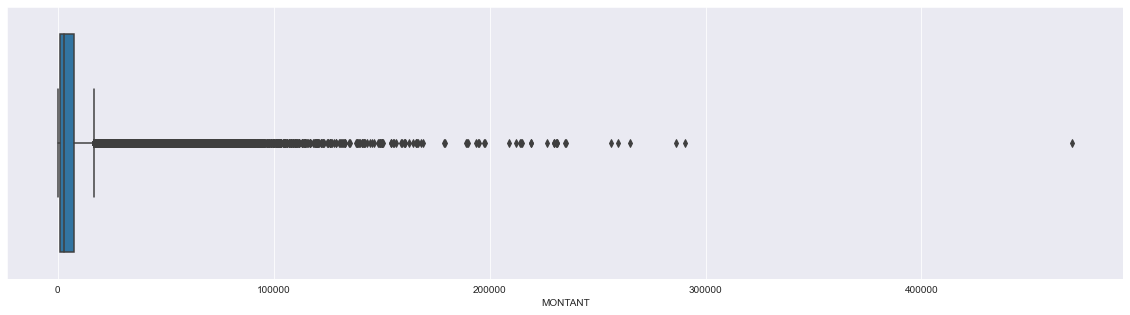

In [157]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_new, x='MONTANT')

<AxesSubplot:xlabel='MONTANT'>

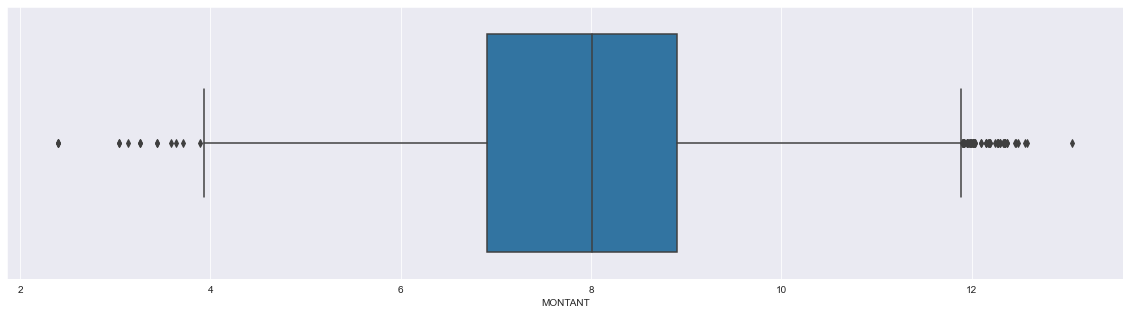

In [158]:
plt.figure(figsize=(20,5))
sns.boxplot(x=np.log1p(train_new['MONTANT']))

In [159]:
train_new["Log_MONTANT"] = np.log1p(train_new["MONTANT"])
Q1 = train_new['Log_MONTANT'].quantile(0.25)
Q3 = train_new['Log_MONTANT'].quantile(0.75)
IQR = Q3 - Q1

In [160]:
# Shows how many objects we drop

train_new[(~train_new['Log_MONTANT'].isna()) & (~((train_new['Log_MONTANT'] >= Q1-1.5*IQR) & (train_new['Log_MONTANT'] <= Q3+1.5*IQR)))]['CHURN'].value_counts()

0    66
1     7
Name: CHURN, dtype: int64

<AxesSubplot:xlabel='Log_MONTANT', ylabel='Count'>

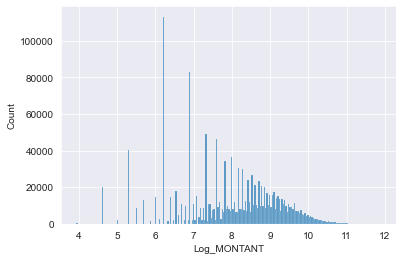

In [161]:
train_new = train_new[(train_new['Log_MONTANT'].isna())|((train_new['Log_MONTANT'] >= Q1-1.5*IQR) & (train_new['Log_MONTANT'] <= Q3+1.5*IQR))]
train_new.drop(columns=["MONTANT"],inplace=True)
sns.histplot(x=train_new['Log_MONTANT'])

In [162]:
test_new["Log_MONTANT"] = np.log1p(test_new["MONTANT"])
test_new.drop(columns=["MONTANT"],inplace=True)

<AxesSubplot:xlabel='Log_MONTANT'>

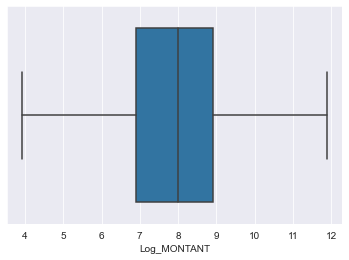

In [163]:
sns.boxplot(x=train_new['Log_MONTANT'])

#### FREQUENCE_RECH

In [164]:
train_new['FREQUENCE_RECH'].isna().sum()

756739

<AxesSubplot:xlabel='FREQUENCE_RECH'>

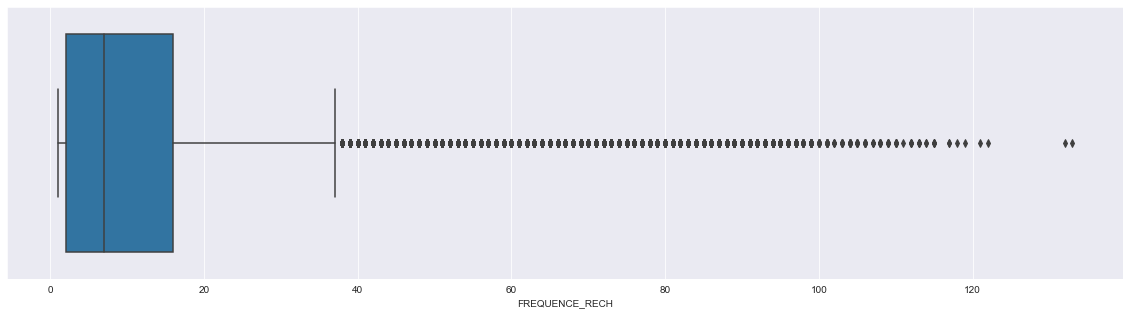

In [165]:
plt.figure(figsize=(20,5))
sns.boxplot(x=train_new['FREQUENCE_RECH'])

<AxesSubplot:xlabel='FREQUENCE_RECH'>

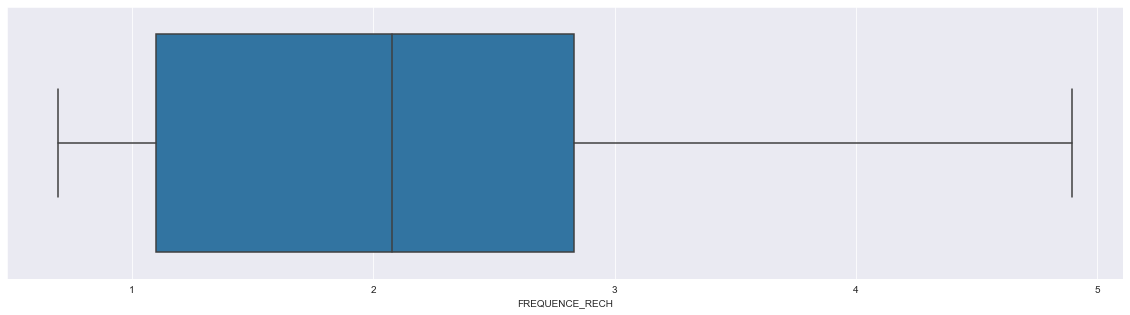

In [166]:
plt.figure(figsize=(20,5))
sns.boxplot(x=np.log1p(train_new['FREQUENCE_RECH']))

<AxesSubplot:xlabel='Log_FREQUENCE_RECH', ylabel='Count'>

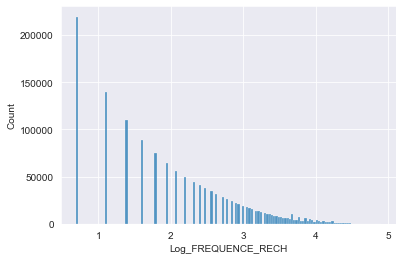

In [167]:
train_new["Log_FREQUENCE_RECH"] = np.log1p(train_new["FREQUENCE_RECH"])
train_new.drop(columns=["FREQUENCE_RECH"],inplace=True)
sns.histplot(train_new["Log_FREQUENCE_RECH"])

In [168]:
test_new["Log_FREQUENCE_RECH"] = np.log1p(test_new["FREQUENCE_RECH"])
test_new.drop(columns=["FREQUENCE_RECH"],inplace=True)

#### REVENUE

In [169]:
train_new['REVENUE'].isna().sum()

726043

<AxesSubplot:xlabel='REVENUE'>

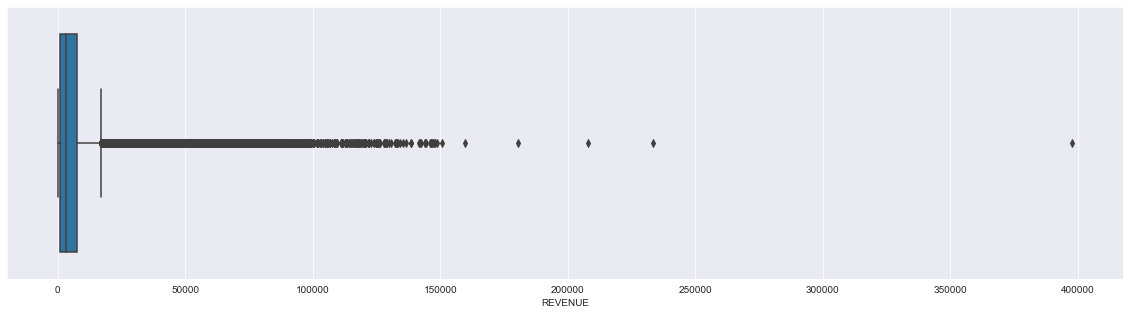

In [170]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_new, x='REVENUE')

<AxesSubplot:xlabel='REVENUE'>

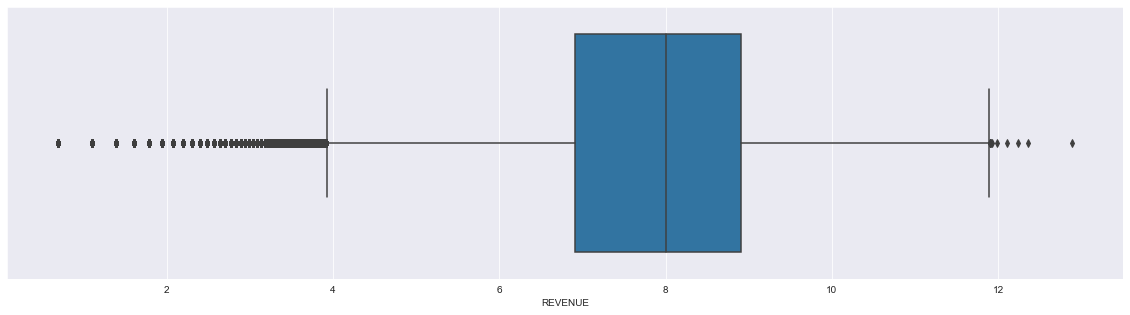

In [171]:
plt.figure(figsize=(20,5))
sns.boxplot(x=np.log1p(train_new['REVENUE']))

In [172]:
train_new["Log_REVENUE"] = np.log1p(train_new["REVENUE"])
Q1 = train_new['Log_REVENUE'].quantile(0.25)
Q3 = train_new['Log_REVENUE'].quantile(0.75)
IQR = Q3 - Q1

In [173]:
# Shows how many objects we drop

train_new[(~train_new['Log_REVENUE'].isna()) & (~((train_new['Log_REVENUE'] >= Q1-1.5*IQR) & (train_new['Log_REVENUE'] <= Q3+1.5*IQR)))]['CHURN'].value_counts()

0    21105
1    10946
Name: CHURN, dtype: int64

<AxesSubplot:xlabel='Log_REVENUE', ylabel='Count'>

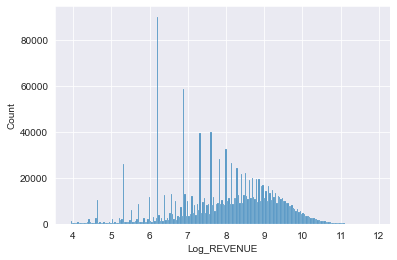

In [174]:
train_new = train_new[(train_new['Log_REVENUE'].isna()) | (train_new['Log_REVENUE'] >= Q1-1.5*IQR) & (train_new['Log_REVENUE'] <= Q3+1.5*IQR)]
train_new.drop(columns=["REVENUE"],inplace=True)
sns.histplot(x=train_new['Log_REVENUE'])

<AxesSubplot:xlabel='Log_REVENUE', ylabel='Count'>

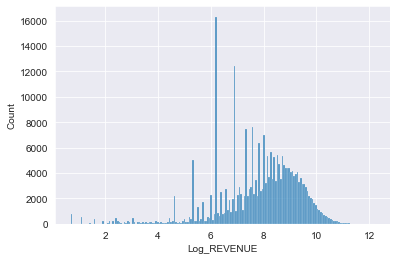

In [175]:
test_new["Log_REVENUE"] = np.log1p(test_new["REVENUE"])
test_new.drop(columns=["REVENUE"],inplace=True)
sns.histplot(x=test_new['Log_REVENUE'])

<AxesSubplot:xlabel='Log_REVENUE'>

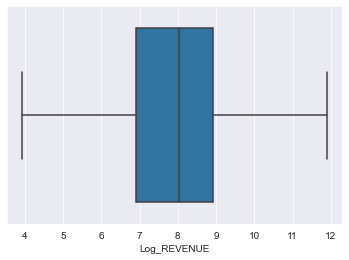

In [176]:
sns.boxplot(x=train_new['Log_REVENUE'])

#### DATA VOLUME

In [177]:
train_new['DATA_VOLUME'].isna().sum()

1034956

<AxesSubplot:xlabel='DATA_VOLUME'>

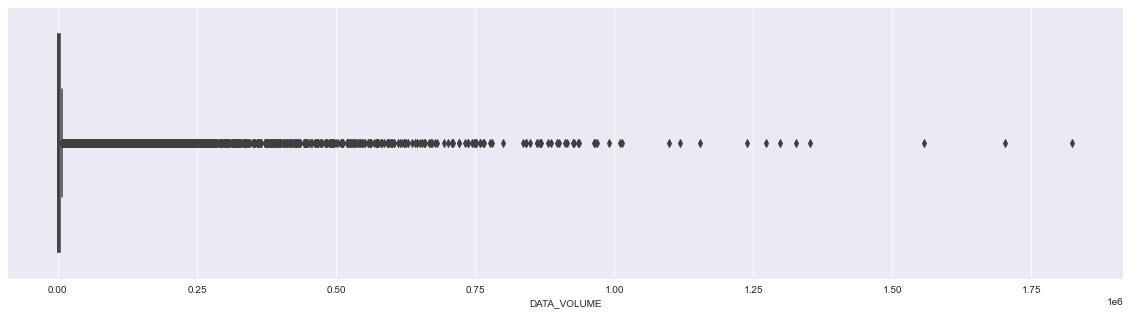

In [178]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_new, x='DATA_VOLUME')

<AxesSubplot:xlabel='DATA_VOLUME'>

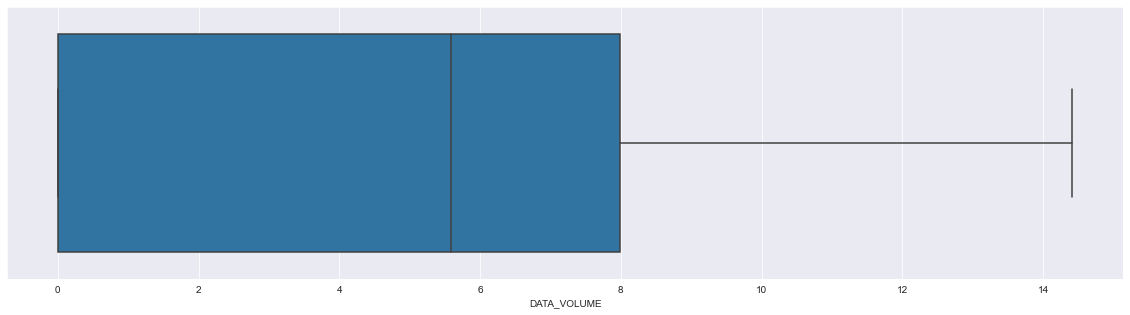

In [179]:
plt.figure(figsize=(20,5))
sns.boxplot(x=np.log1p(train_new['DATA_VOLUME']))

<AxesSubplot:xlabel='Log_DATA_VOLUME', ylabel='Count'>

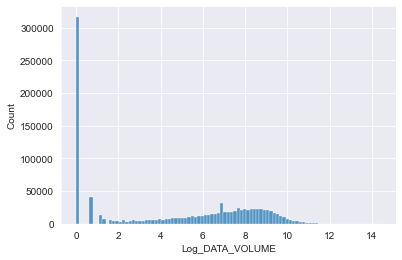

In [180]:
train_new["Log_DATA_VOLUME"] = np.log1p(train_new["DATA_VOLUME"])
train_new.drop(columns=["DATA_VOLUME"], inplace=True)
sns.histplot(train_new["Log_DATA_VOLUME"])

In [181]:
test_new["Log_DATA_VOLUME"] = np.log1p(test_new["DATA_VOLUME"])
test_new.drop(columns=["DATA_VOLUME"], inplace=True)

#### ON_NET

In [182]:
train_new['ON_NET'].isna().sum()

763050

<AxesSubplot:xlabel='ON_NET'>

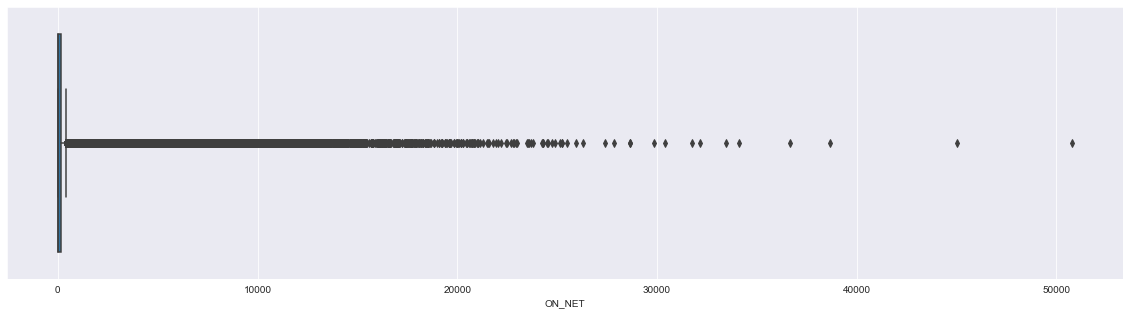

In [183]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_new, x='ON_NET')

<AxesSubplot:xlabel='ON_NET'>

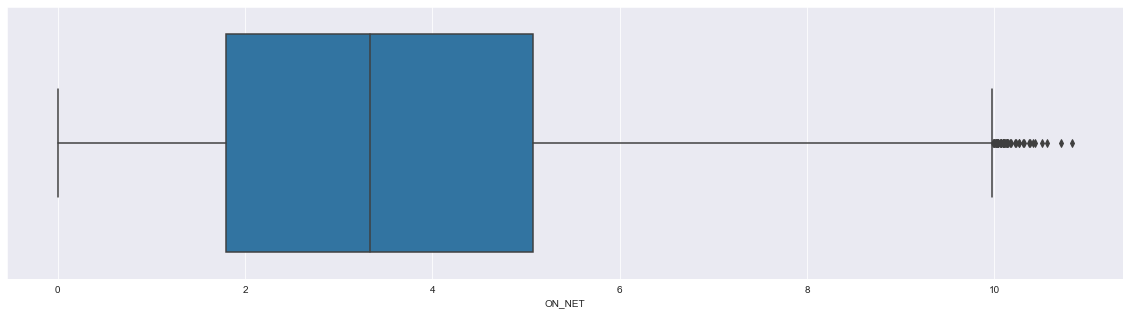

In [184]:
plt.figure(figsize=(20,5))
sns.boxplot(x=np.log1p(train_new['ON_NET']))

In [185]:
train_new["Log_ON_NET"] = np.log1p(train_new["ON_NET"])
Q1 = train_new['Log_ON_NET'].quantile(0.25)
Q3 = train_new['Log_ON_NET'].quantile(0.75)
IQR = Q3 - Q1

In [186]:
# Shows how many objects we drop
train_new[(~train_new['Log_ON_NET'].isna()) & (~((train_new['Log_ON_NET'] >= Q1-1.5*IQR) & (train_new['Log_ON_NET'] <= Q3+1.5*IQR)))]['CHURN'].value_counts()

0    43
Name: CHURN, dtype: int64

<AxesSubplot:xlabel='Log_ON_NET', ylabel='Count'>

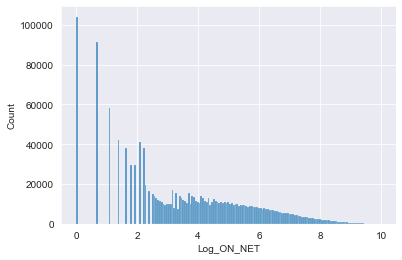

In [187]:
train_new = train_new[(train_new['Log_ON_NET'].isna()) | (train_new['Log_ON_NET'] >= Q1-1.5*IQR) & (train_new['Log_ON_NET'] <= Q3+1.5*IQR)]
train_new.drop(columns=["ON_NET"],inplace=True)
sns.histplot(x=train_new['Log_ON_NET'])

<AxesSubplot:xlabel='Log_ON_NET', ylabel='Count'>

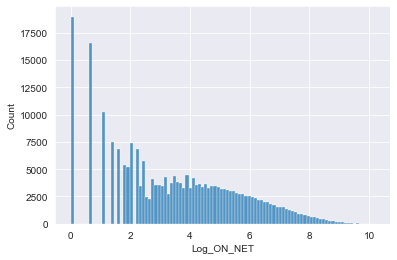

In [188]:
test_new["Log_ON_NET"] = np.log1p(test_new["ON_NET"])
test_new.drop(columns=["ON_NET"],inplace=True)
sns.histplot(x=test_new['Log_ON_NET'])

<AxesSubplot:xlabel='Log_ON_NET'>

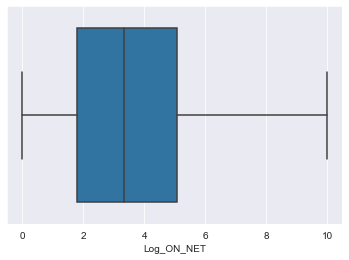

In [189]:
sns.boxplot(x=train_new['Log_ON_NET'])

#### REGULARITY

In [190]:
train_new['REGULARITY'].isna().sum()

0

<AxesSubplot:xlabel='REGULARITY'>

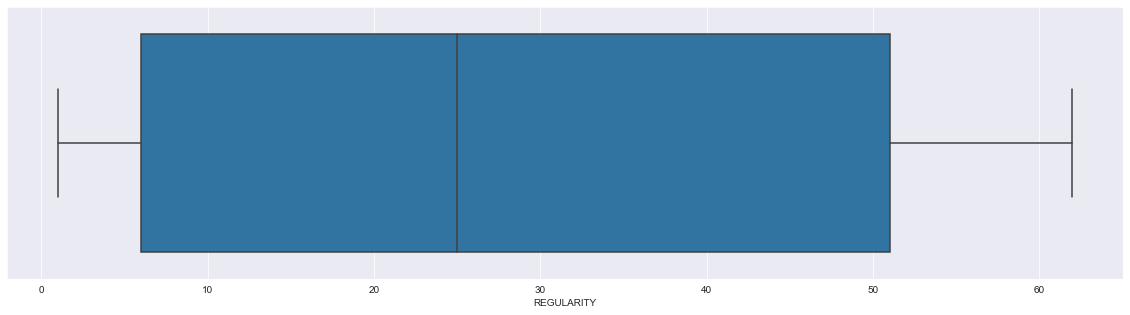

In [191]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_new, x='REGULARITY')

<AxesSubplot:xlabel='REGULARITY', ylabel='Count'>

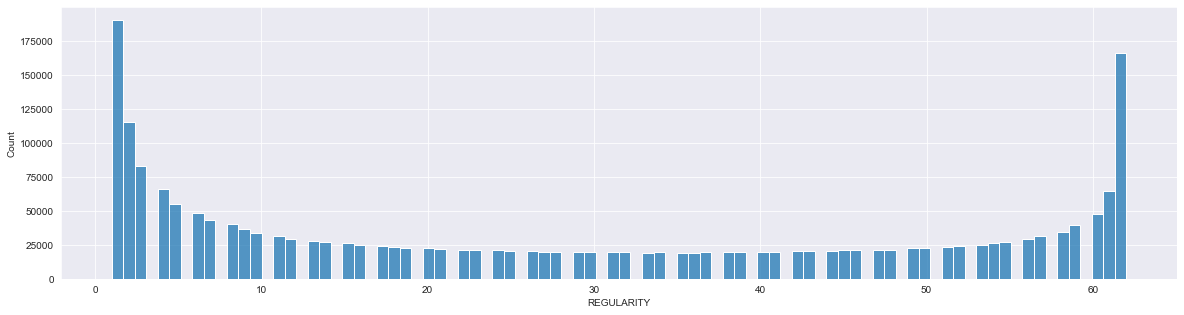

In [192]:
plt.figure(figsize=(20,5))
sns.histplot(data=train_new, x='REGULARITY')

#### FREQ TOP PACK

In [193]:
train_new['FREQ_TOP_PACK'].isna().sum()

870589

<AxesSubplot:xlabel='FREQ_TOP_PACK'>

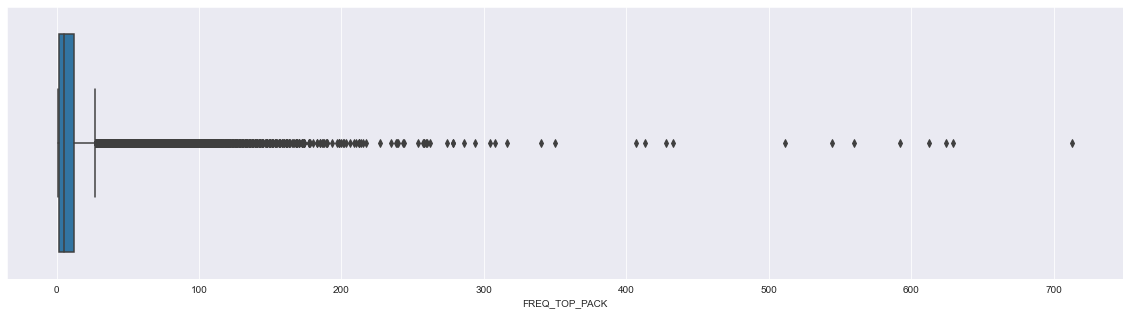

In [194]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_new, x='FREQ_TOP_PACK')

<AxesSubplot:xlabel='FREQ_TOP_PACK'>

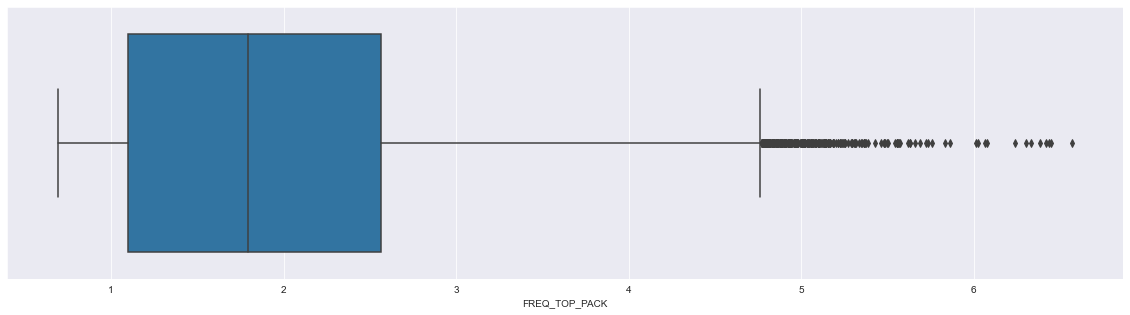

In [195]:
plt.figure(figsize=(20,5))
sns.boxplot(x=np.log1p(train_new['FREQ_TOP_PACK']))

In [196]:
train_new.shape

(2121881, 37)

In [197]:
train_new["Log_FREQ_TOP_PACK"] = np.log1p(train_new["FREQ_TOP_PACK"])
Q1 = train_new['Log_FREQ_TOP_PACK'].quantile(0.25)
Q3 = train_new['Log_FREQ_TOP_PACK'].quantile(0.75)
IQR = Q3 - Q1

In [198]:
# shows how many objects we drop
train_new[(~train_new['Log_FREQ_TOP_PACK'].isna()) & (~((train_new['Log_FREQ_TOP_PACK'] >= Q1-1.5*IQR) & (train_new['Log_FREQ_TOP_PACK'] <= Q3+1.5*IQR)))]['CHURN'].value_counts()

0    442
1      4
Name: CHURN, dtype: int64

<AxesSubplot:xlabel='Log_FREQ_TOP_PACK', ylabel='Count'>

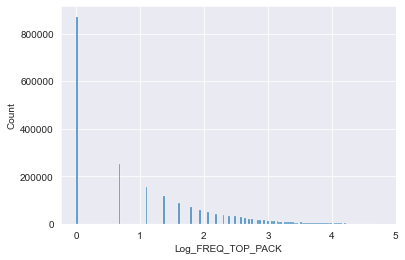

In [199]:
train_new = train_new[(train_new['Log_FREQ_TOP_PACK'].isna()) | (train_new['Log_FREQ_TOP_PACK'] >= Q1-1.5*IQR) & (train_new['Log_FREQ_TOP_PACK'] <= Q3+1.5*IQR)]
train_new.drop(columns=["FREQ_TOP_PACK"],inplace=True)
train_new['Log_FREQ_TOP_PACK'].fillna(0, inplace=True)
sns.histplot(x=train_new['Log_FREQ_TOP_PACK'])

In [200]:
test_new["Log_FREQ_TOP_PACK"] = np.log1p(test_new["FREQ_TOP_PACK"])
test_new.drop(columns=["FREQ_TOP_PACK"],inplace=True)
test_new['Log_FREQ_TOP_PACK'].fillna(0, inplace=True)

<AxesSubplot:xlabel='Log_FREQ_TOP_PACK'>

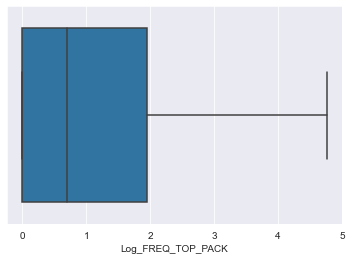

In [201]:
sns.boxplot(x=train_new['Log_FREQ_TOP_PACK'])

In [202]:
train_new.shape

(2121435, 37)

## Target

<AxesSubplot:xlabel='CHURN', ylabel='Count'>

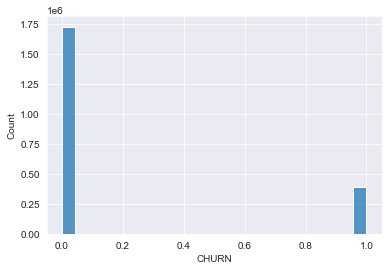

In [203]:
sns.histplot(train_new["CHURN"])

## Model on all features with scaling

In [205]:
train_pos = train_new[train_new.CHURN==1].dropna()
train_neg = train_new[train_new.CHURN==0]
train_neg = train_neg[(train_neg.TIGO_na==0)&(train_new.ORANGE_na==0)].dropna()
train_final = pd.concat((train_pos, train_neg)).drop(columns=['TIGO_na', 'ORANGE_na'])
train_final.drop(columns='user_id', inplace=True)
train_final['CHURN'].value_counts()
#test_new.drop(columns=['user_id', 'TIGO_na', 'ORANGE_na'], inplace=True)

0    522977
1     29316
Name: CHURN, dtype: int64

In [206]:
X = train_final.drop(columns='CHURN')
y = train_final['CHURN']

scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle=True, stratify=y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_lr = LogisticRegression(class_weight="balanced")
model_lr.fit(X_train, y_train)
print("Result of Logistic Regression :")
get_metrics(y_test, model_lr.predict(X_test))

print("-----------------------------------")
xgb = XGBClassifier(scale_pos_weight=(y_train.shape[0] - y_train.sum())/y_train.sum())
xgb.fit(X_train, y_train)
print("Result of XGBoost:")
get_metrics(y_test, xgb.predict(X_test))

Result of Logistic Regression :
Accuracy score is 0.8842281879194631
ROC AUC score is 0.8922891626328168
Recall score is 0.9013075611142695
Precision score is 0.30208452421782706
F1 score is 0.45250599383491263
-----------------------------------
[01:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Result of XGBoost:
Accuracy score is 0.8787178311042442
ROC AUC score is 0.8926530157988671
Recall score is 0.9082433200682206
Precision score is 0.29285819035049127
F1 score is 0.4429042721299659


## Tuned Logistic Regression

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

clf = LogisticRegression(max_iter=5000, class_weight="balanced")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = {
    'C': np.logspace(-3,1,20)
}

gs = GridSearchCV(clf, param_grid=grid, cv=cv, n_jobs=-1, scoring='roc_auc', verbose=10)
gs.fit(X_train, y_train)
clf = LogisticRegression(max_iter=5000, C=gs.best_params_['C'])
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


LogisticRegression(C=0.0026366508987303583, max_iter=5000)

In [90]:
print("Best parameter of C is", gs.best_params_['C'])
print()
get_metrics(y_test, clf.predict(X_test))

Best parameter of C is 0.0026366508987303583

Accuracy score is 0.9574380763845299
ROC AUC score is 0.700997564679704
Recall score is 0.41409891984081865
Precision score is 0.6572820790471035
F1 score is 0.5080915178571429


## Tuned XGBoost

In [93]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid = {'n_estimators': np.arange(100, 600, 100),
        'max_depth': np.arange(2, 8, 2),
        'learning_rate': [0.01, 0.3, 1.0]
       }

xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, predictor='gpu_predictor', scale_pos_weight=18, n_jobs=-1, verbosity=1)
gs_xgb = GridSearchCV(xgb, param_grid=grid, cv=cv, verbose=1)
gs_xgb.fit(X_train, y_train.values.reshape(-1,));
gs_xgb.best_estimator_
#y_pred_xgb = gs_xgb.best_estimator_.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[22:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:3

[22:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=-1,
              num_parallel_tree=1, predictor='gpu_predictor', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=1)

In [94]:
print("Best parameters are:", gs_xgb.best_params_)
print()
get_metrics(y_test, gs_xgb.best_estimator_.predict(X_test))

Best parameters are: {'learning_rate': 1.0, 'max_depth': 6, 'n_estimators': 600}

Accuracy score is 0.9329221186808943
ROC AUC score is 0.785720184648607
Recall score is 0.6210346787947697
Precision score is 0.4124443102016159
F1 score is 0.49568926399854796


## Making results and submitting

In [207]:
montant = test_new.groupby(['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'])['Log_MONTANT'].median().reset_index()
frequence = test_new.groupby(['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'])['Log_FREQUENCE_RECH'].median().reset_index()
revenue = test_new.groupby(['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'])['Log_REVENUE'].median().reset_index()
volume = test_new.groupby(['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'])['Log_DATA_VOLUME'].median().reset_index()
net = test_new.groupby(['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'])['Log_ON_NET'].median().reset_index()

In [208]:
test_final = test_new.merge(montant, how='left', on=['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'], suffixes=['', '_y'])
test_final = test_final.merge(frequence, how='left', on=['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'], suffixes=['', '_y'])
test_final = test_final.merge(revenue, how='left', on=['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'], suffixes=['', '_y'])
test_final = test_final.merge(volume, how='left', on=['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'], suffixes=['', '_y'])
test_final = test_final.merge(net, how='left', on=['REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TOP_PACK_cat_All-net', 'TOP_PACK_cat_Data', 'TOP_PACK_cat_Mixt', 'TOP_PACK_cat_On-net', 'TOP_PACK_cat_Others'], suffixes=['', '_y'])

In [209]:
test_final.loc[test_final['Log_FREQUENCE_RECH'].isna(), 'Log_FREQUENCE_RECH'] = test_final[test_final['Log_FREQUENCE_RECH'].isna()]['Log_FREQUENCE_RECH_y']
test_final.loc[test_final['Log_MONTANT'].isna(), 'Log_MONTANT'] = test_final[test_final['Log_MONTANT'].isna()]['Log_MONTANT_y']
test_final.loc[test_final['Log_REVENUE'].isna(), 'Log_REVENUE'] = test_final[test_final['Log_REVENUE'].isna()]['Log_REVENUE_y']
test_final.loc[test_final['Log_DATA_VOLUME'].isna(), 'Log_DATA_VOLUME'] = test_final[test_final['Log_DATA_VOLUME'].isna()]['Log_DATA_VOLUME_y']
test_final.loc[test_final['Log_ON_NET'].isna(), 'Log_ON_NET'] = test_final[test_final['Log_ON_NET'].isna()]['Log_ON_NET_y']

In [210]:
test_final.fillna(0, inplace=True)

In [211]:
test.shape

(380127, 13)

In [212]:
test_final.shape

(380127, 41)

In [216]:
test_final.drop(columns=['user_id', 'TIGO_na', 'ORANGE_na', 'Log_MONTANT_y', 'Log_FREQUENCE_RECH_y', 'Log_REVENUE_y', 'Log_DATA_VOLUME_y', 'Log_ON_NET_y'], inplace=True)

In [219]:
y_pred = xgb.predict(test_final)
#submission["CHURN"] = y_pred
print('We achieve ROC-AUC: 0.8549')

We achieve ROC-AUC: 0.8549


In [220]:
xgb = XGBClassifier(scale_pos_weight=(y_train.shape[0] - y_train.sum())/y_train.sum(), n_jobs=-1, verbosity=1)
xgb.fit(X, y)

[01:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=17.839481506749184,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

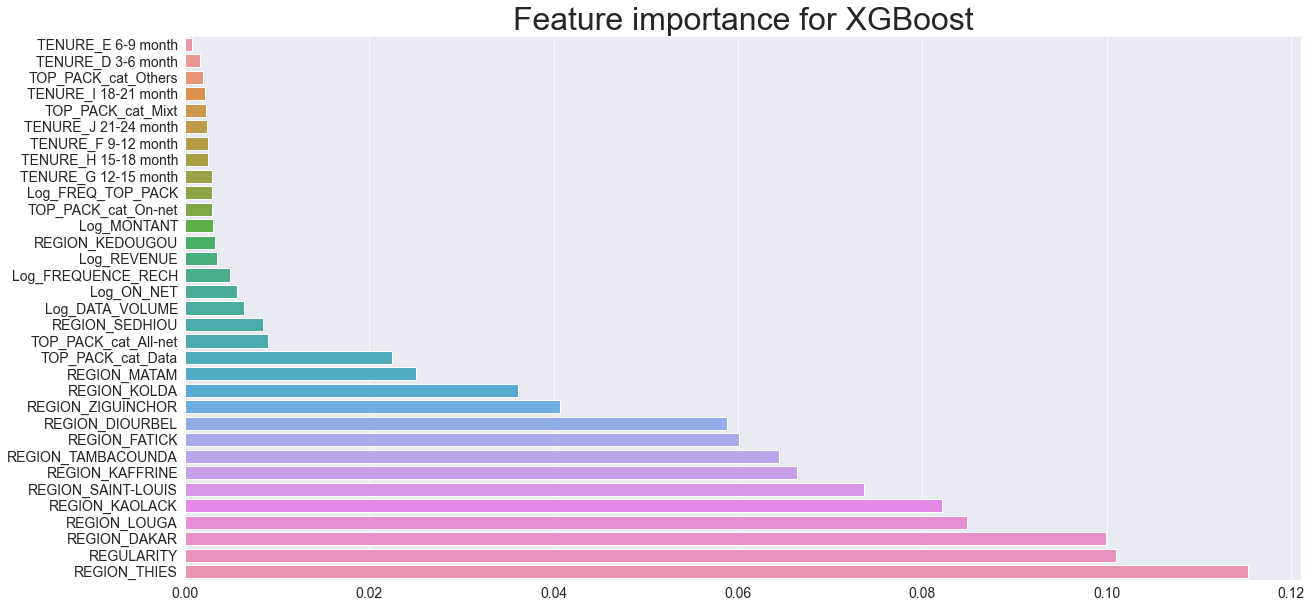

In [221]:
plt.figure(figsize=(20, 10))
plt.title('Feature importance for XGBoost', fontdict = {'fontsize' : 32})
fig = sns.barplot(y=X.columns[xgb.feature_importances_.argsort()], x=sorted(xgb.feature_importances_))
fig.tick_params(labelsize=14)

In [ ]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,1


In [ ]:
submission.to_csv('starter_code_submission.csv', index=False)